In [1]:
import numpy as np 
import pandas as pd
from sklearn.datasets import make_classification

In [2]:
X,y = make_classification(n_features=5, n_redundant=0,n_informative=5, n_clusters_per_class=1)

In [ ]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y

In [ ]:
df.shape

In [ ]:
df.head(10)

In [10]:
# function for row sampling
import random
def sample_rows(df,percent):
    return df.sample(int(percent*df.shape[0]), replace=True)

In [ ]:
sample_rows(df,0.1)

In [11]:
# function for feature sampling
def sample_features(df,percent):
    cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
    new_df = df[cols]
    new_df['target'] = df['target']
    return new_df

In [ ]:
sample_features(df,0.4)

In [23]:
# combined sampling
def combined_sampling(df, row_percent, col_percent):
    new_df = sample_rows(df,row_percent)
    return sample_features(new_df, col_percent)

In [40]:
df1 = combined_sampling(df,0.5,0.5)

C:\Users\akkan\AppData\Local\Temp\ipykernel_13528\3999859604.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [41]:
df2 = combined_sampling(df,0.5,0.5)

C:\Users\akkan\AppData\Local\Temp\ipykernel_13528\3999859604.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [42]:
df3 = combined_sampling(df,0.5,0.5)

C:\Users\akkan\AppData\Local\Temp\ipykernel_13528\3999859604.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [43]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col1', 'col5', 'target'], dtype='object')
Index(['col5', 'col4', 'target'], dtype='object')
Index(['col4', 'col1', 'target'], dtype='object')


In [44]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [45]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [46]:
from sklearn.tree import plot_tree

[Text(0.39285714285714285, 0.9, 'x[0] <= 0.638\ngini = 0.461\nsamples = 50\nvalue = [32, 18]'),
 Text(0.14285714285714285, 0.7, 'x[0] <= 0.094\ngini = 0.124\nsamples = 30\nvalue = [28, 2]'),
 Text(0.26785714285714285, 0.8, 'True  '),
 Text(0.07142857142857142, 0.5, 'gini = 0.0\nsamples = 23\nvalue = [23, 0]'),
 Text(0.21428571428571427, 0.5, 'x[1] <= -0.389\ngini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(0.14285714285714285, 0.3, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.2857142857142857, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6428571428571429, 0.7, 'x[1] <= 0.562\ngini = 0.32\nsamples = 20\nvalue = [4, 16]'),
 Text(0.5178571428571429, 0.8, '  False'),
 Text(0.5, 0.5, 'x[1] <= 0.169\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.42857142857142855, 0.3, 'x[0] <= 1.502\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.35714285714285715, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 T

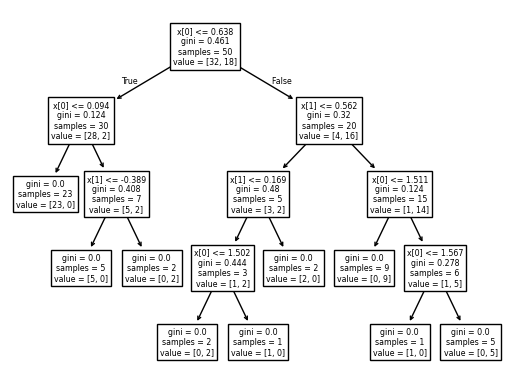

In [47]:
plot_tree(clf1)

[Text(0.5714285714285714, 0.9375, 'x[0] <= -0.486\ngini = 0.48\nsamples = 50\nvalue = [20, 30]'),
 Text(0.42857142857142855, 0.8125, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.5, 0.875, 'True  '),
 Text(0.7142857142857143, 0.8125, 'x[0] <= 1.858\ngini = 0.355\nsamples = 39\nvalue = [9, 30]'),
 Text(0.6428571428571428, 0.875, '  False'),
 Text(0.5714285714285714, 0.6875, 'x[1] <= 1.295\ngini = 0.307\nsamples = 37\nvalue = [7, 30]'),
 Text(0.42857142857142855, 0.5625, 'x[0] <= 0.704\ngini = 0.403\nsamples = 25\nvalue = [7.0, 18.0]'),
 Text(0.2857142857142857, 0.4375, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.5714285714285714, 0.4375, 'x[1] <= 1.18\ngini = 0.298\nsamples = 22\nvalue = [4, 18]'),
 Text(0.42857142857142855, 0.3125, 'x[1] <= -0.661\ngini = 0.1\nsamples = 19\nvalue = [1, 18]'),
 Text(0.2857142857142857, 0.1875, 'x[1] <= -0.787\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.14285714285714285, 0.0625, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text

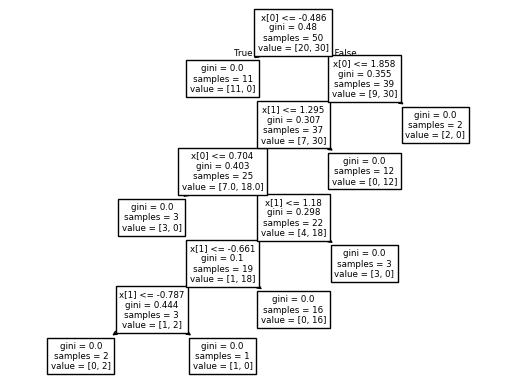

In [48]:
plot_tree(clf2)

[Text(0.5666666666666667, 0.9375, 'x[1] <= 0.237\ngini = 0.487\nsamples = 50\nvalue = [21.0, 29.0]'),
 Text(0.26666666666666666, 0.8125, 'x[0] <= -0.572\ngini = 0.308\nsamples = 21\nvalue = [17, 4]'),
 Text(0.41666666666666663, 0.875, 'True  '),
 Text(0.2, 0.6875, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3333333333333333, 0.6875, 'x[1] <= -0.047\ngini = 0.255\nsamples = 20\nvalue = [17, 3]'),
 Text(0.2, 0.5625, 'x[1] <= -2.229\ngini = 0.124\nsamples = 15\nvalue = [14, 1]'),
 Text(0.13333333333333333, 0.4375, 'x[1] <= -2.344\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.06666666666666667, 0.3125, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.2, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.26666666666666666, 0.4375, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.4666666666666667, 0.5625, 'x[1] <= 0.021\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.4, 0.4375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.5333333333333333, 0.4375,

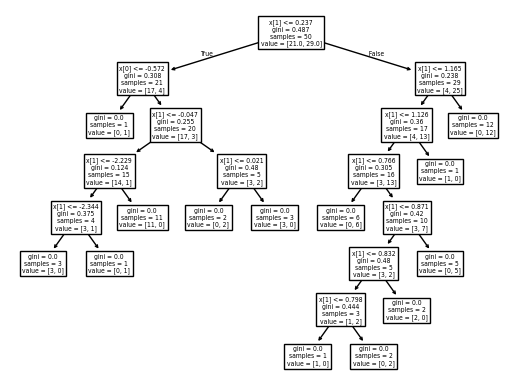

In [49]:
plot_tree(clf3)

In [54]:
clf1.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

c:\Users\akkan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [55]:
clf2.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

c:\Users\akkan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [56]:
clf3.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

c:\Users\akkan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])